In [95]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#Step1
data =  pd.read_csv("customer_data.csv")

## Explore Data in general

### Observations From data features
- **CustomerID**: Unique Identifier, *irrelevant*.
- **Age**: Numerical `int()` data, the outliers more of a domain knowledge. 
- **Gender**: Categorical Data that's already Hot-Encoded.
- **Income**: : Annual income of the customer (in USD), for outliers must plot and explore the data .
- **Tenure**: Numerical `int()` data, the outliers mix of domain knowledge and data exploration.
- **ProductType**: Categorical Data that's already Hot-Encoded.
- **SupportCalls**: Numerical `int()` data, for outliers must plot and explore the data.
- **ChurnStatus**: Categorical Data that's already Hot-Encoded.

In [96]:
data.head(7)

,CustomerID,Age,Gender,Income,Tenure,ProductType,SupportCalls,ChurnStatus
0,CUST0000,59.0,0,151203.0,4.0,0,1.0,0
1,CUST0001,69.0,0,58332.0,6.0,1,9.0,0
2,CUST0002,46.0,1,149481.0,2.0,0,12.0,0
3,CUST0003,32.0,1,115937.0,1.0,1,13.0,0
4,CUST0004,60.0,0,103929.0,4.0,1,5.0,0
5,CUST0005,25.0,1,94206.0,7.0,1,13.0,0
6,CUST0006,38.0,1,116137.0,6.0,0,5.0,0


### Observations From Data Info
Just read the thing -_-

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    3500 non-null   object 
 1   Age           3325 non-null   float64
 2   Gender        3500 non-null   int64  
 3   Income        3328 non-null   float64
 4   Tenure        3325 non-null   float64
 5   ProductType   3500 non-null   int64  
 6   SupportCalls  3329 non-null   float64
 7   ChurnStatus   3500 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 218.9+ KB


### Observations From Data `mean/std`
- **CustomerID**: Unique Identifier, *irrelevant*.
- **Age**: Customers Ages are very variant, most of them are old. 
- **Gender**: Customers gender is so not random, both genders buy equally.
- **Income**: : Customers incomes are very variant, std is even bigger than the mean four times, maybe there's a lot of outliers or *idk*.
- **Tenure**: Customers tenure is variant but not *TOO* variant yk.
- **ProductType**:Like gender.
- **SupportCalls**: STD is really higher than the mean (: .
- **ChurnStatus**: Most of them STAYED.

In [98]:
data.describe()

,Age,Gender,Income,Tenure,ProductType,SupportCalls,ChurnStatus
count,3325.000000,3500.000000,3.328000e+03,3325.000000,3500.000000,3329.000000,3500.000000
mean,43.606617,0.495714,1.406860e+05,5.041504,0.298857,10.078702,0.044857
std,14.931487,0.500053,4.333271e+05,2.571029,0.457822,21.735374,0.207020
min,14.000000,0.000000,2.503700e+04,0.000000,0.000000,1.000000,0.000000
25%,31.000000,0.000000,5.653025e+04,3.000000,0.000000,3.000000,0.000000
50%,43.000000,0.000000,8.953250e+04,5.000000,0.000000,7.000000,0.000000
75%,56.000000,1.000000,1.215025e+05,7.000000,1.000000,11.000000,0.000000
max,69.000000,1.000000,5.004849e+06,9.000000,1.000000,200.000000,1.000000


### Data Plots - Numerical

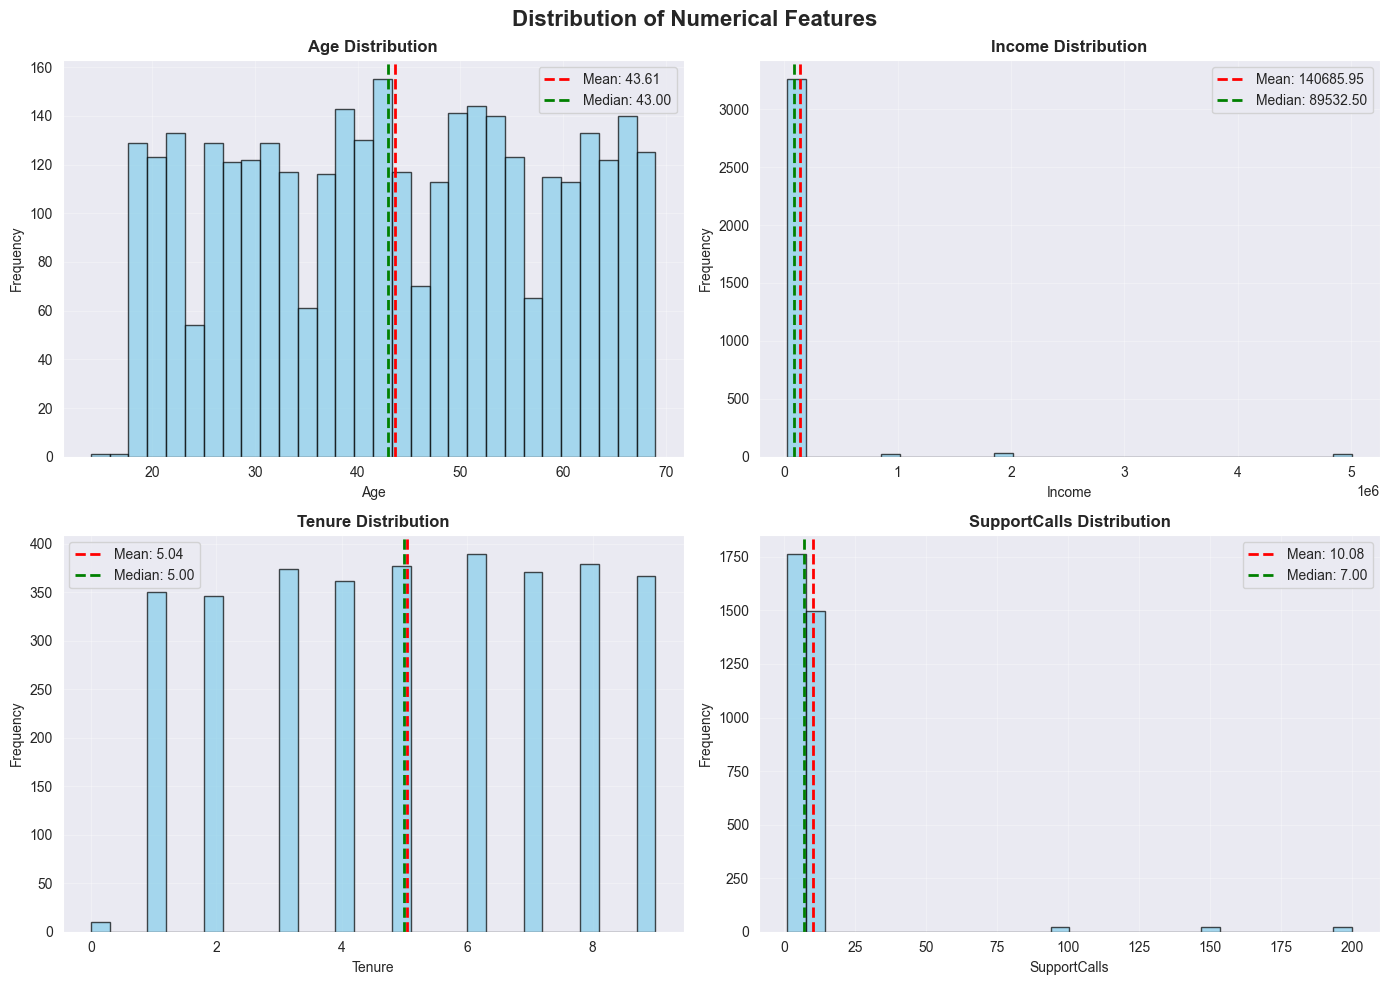

In [99]:
import matplotlib.pyplot as plt
import math
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features.remove("Gender")
numerical_features.remove("ProductType")
numerical_features.remove("ChurnStatus")

n_features = len(numerical_features)
n_cols = 2
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(7*n_cols, 5*n_rows))
fig.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold')
axes = axes.flatten() if n_features > 1 else [axes]
for idx, feature in enumerate(numerical_features):
    axes[idx].hist(data[feature], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{feature} Distribution', fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].axvline(data[feature].mean(), color='red', linestyle='--', 
                      linewidth=2, label=f'Mean: {data[feature].mean():.2f}')
    axes[idx].axvline(data[feature].median(), color='green', linestyle='--', 
                      linewidth=2, label=f'Median: {data[feature].median():.2f}')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
# plt.savefig('distributions.png', dpi=300, bbox_inches='tight')
plt.show()

### Data Plot - Categorical

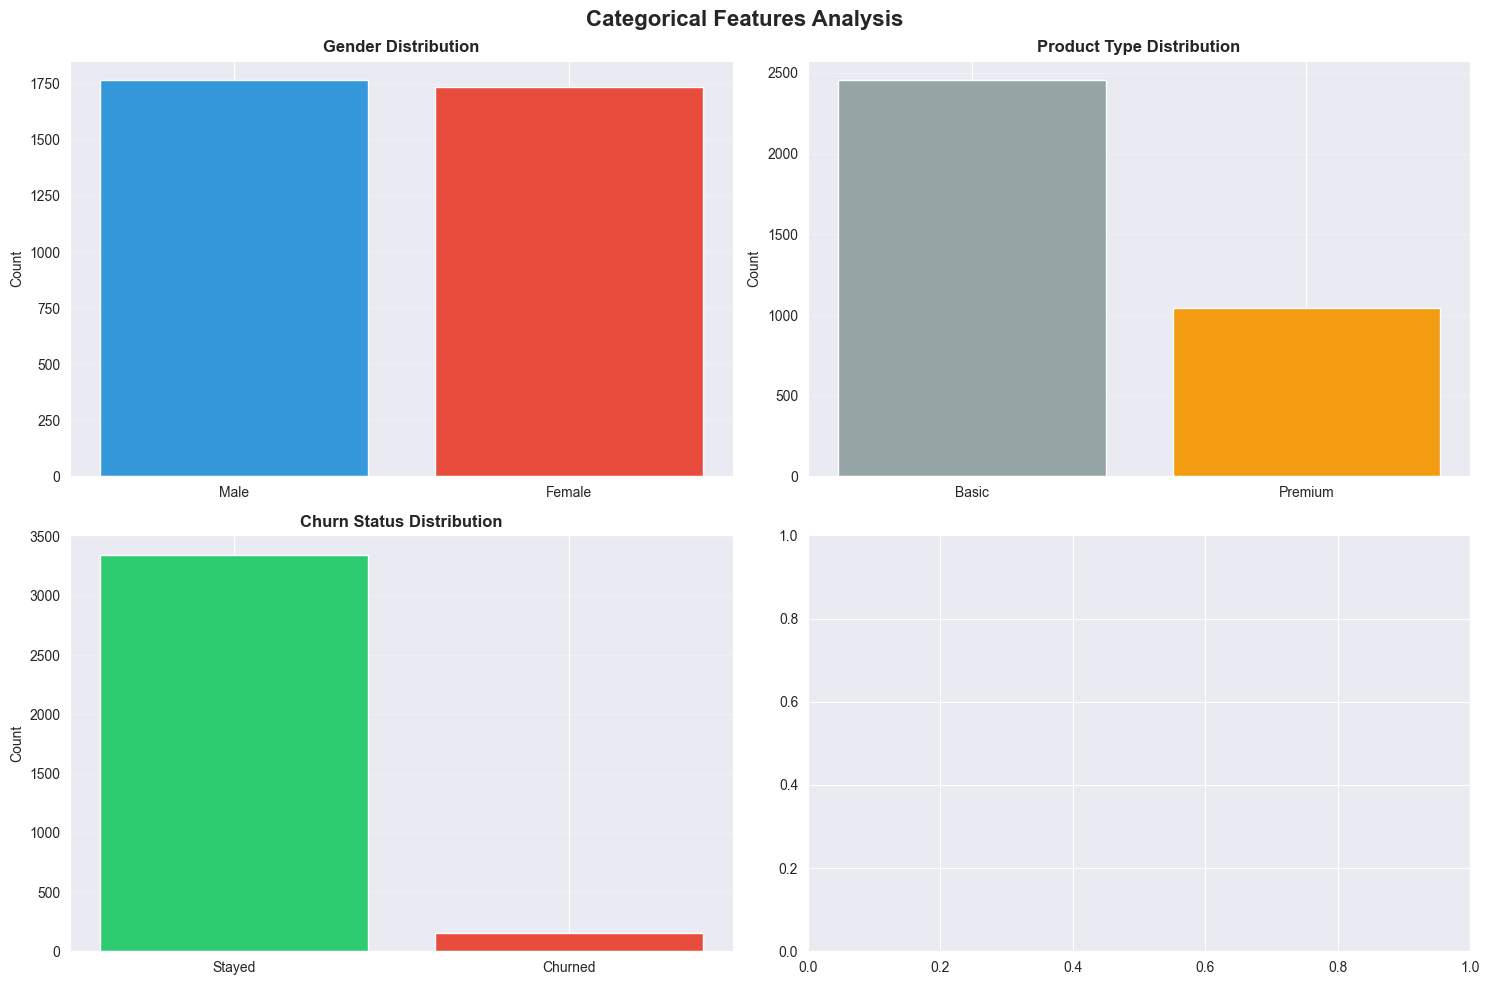

In [100]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Categorical Features Analysis', fontsize=16, fontweight='bold')
# Gender distribution
gender_counts = data['Gender'].value_counts()
axes[0, 0].bar(['Male', 'Female'], gender_counts.values, color=['#3498db', '#e74c3c'])
axes[0, 0].set_title('Gender Distribution', fontweight='bold')
axes[0, 0].set_ylabel('Count')
axes[0, 0].grid(True, alpha=0.3, axis='y')
# Product Type distribution
product_counts = data['ProductType'].value_counts()
axes[0, 1].bar(['Basic', 'Premium'], product_counts.values, color=['#95a5a6', '#f39c12'])
axes[0, 1].set_title('Product Type Distribution', fontweight='bold')
axes[0, 1].set_ylabel('Count')
axes[0, 1].grid(True, alpha=0.3, axis='y')
# Churn Status distribution
churn_counts = data['ChurnStatus'].value_counts()
colors = ['#2ecc71', '#e74c3c']
axes[1, 0].bar(['Stayed', 'Churned'], churn_counts.values, color=colors)
axes[1, 0].set_title('Churn Status Distribution', fontweight='bold')
axes[1, 0].set_ylabel('Count')
axes[1, 0].grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [101]:
data.isnull().sum()

CustomerID        0
Age             175
Gender            0
Income          172
Tenure          175
ProductType       0
SupportCalls    171
ChurnStatus       0
dtype: int64

### Age
#### Age: Dealing with **Outliers**

In [102]:
len(data[(data["Age"] < 18) | (data["Age"] > 90)])

2

#### Drop any age that is less than 18, because there are only two rows 
#### (and they're not adults -_-)

In [103]:
data_clean_age = data[(data["Age"] >= 18) | data["Age"].isna()].copy()

#### Age: Dealing with **Missing Values**

In [104]:
print(data_clean_age.isnull().sum())

CustomerID        0
Age             175
Gender            0
Income          171
Tenure          175
ProductType       0
SupportCalls    171
ChurnStatus       0
dtype: int64


In [105]:
data_clean_age["Age"].describe()

count    3323.000000
mean       43.623533
std        14.919996
min        18.000000
25%        31.000000
50%        43.000000
75%        56.000000
max        69.000000
Name: Age, dtype: float64

#### We noticed that the mean and median are relatively close 43.6 and 43 indicating that our data is symmetric, and it won’t really matter which we take so we took the mean which is 44 since the data is barely skewed


In [106]:
skew_value = data_clean_age["Age"].skew()
print(f"Skewness of '{"Age"}': {skew_value}")
data_clean_age["Age"].fillna(int(data_clean_age["Age"].mean()) + 1, inplace=True)


Skewness of 'Age': -0.01749701578393137


In [107]:
print(data_clean_age.isnull().sum())

CustomerID        0
Age               0
Gender            0
Income          171
Tenure          175
ProductType       0
SupportCalls    171
ChurnStatus       0
dtype: int64


In [108]:
skew_value = data_clean_age["Age"].skew()
print(f"Skewness of '{"Age"}': {skew_value}")

Skewness of 'Age': -0.0218373500375542


#### Gender ...

### Income
#### Income: Dealing with **Missing Values**

In [109]:
data_income = data_clean_age.copy()
skew_value = data_income["Income"].skew()
print(f"Skewness of '{"Income"}': {skew_value}")

Skewness of 'Income': 9.643595904363522


In [110]:
data_income["Income"].median()

np.float64(89510.0)

#### Looking at the histogram for the income we can see that the data is skewed so we decided to fill the missing data with the median

In [111]:
data_income["Income"].fillna(data_income["Income"].median(), inplace=True)

In [112]:
print(data_income.isnull().sum())

CustomerID        0
Age               0
Gender            0
Income            0
Tenure          175
ProductType       0
SupportCalls    171
ChurnStatus       0
dtype: int64


#### Income: Dealing with **Outliers**

In [113]:
data_income["Income"].describe()

count    3.498000e+03
mean     1.381940e+05
std      4.228069e+05
min      2.503700e+04
25%      5.834950e+04
50%      8.951000e+04
75%      1.199192e+05
max      5.004849e+06
Name: Income, dtype: float64

In [114]:
Q1 = data_income["Income"].quantile(0.25)
Q3 = data_income["Income"].quantile(0.75)
IQR = Q3 - Q1
income_lower_outliers_value = Q1 - 1.5 * IQR
income_lower_outliers_value

np.float64(-34005.125)

In [115]:
Q1 = data_income["Income"].quantile(0.25)
Q3 = data_income["Income"].quantile(0.75)
IQR = Q3 - Q1
income_upper_outliers_value = Q3 + 1.5 * IQR
income_upper_outliers_value

np.float64(212273.875)

#### Printing the income outliers 

In [116]:
data_income[
    (data_income["Income"] > income_upper_outliers_value) |
    (data_income["Income"] < data_income["Income"].min())
]["Income"]

116     5003294.0
127     2000000.0
149     2000000.0
168     2000000.0
207     1002921.0
          ...    
3228    5000000.0
3230    2000000.0
3343    1000000.0
3458    1000000.0
3470    5000000.0
Name: Income, Length: 70, dtype: float64

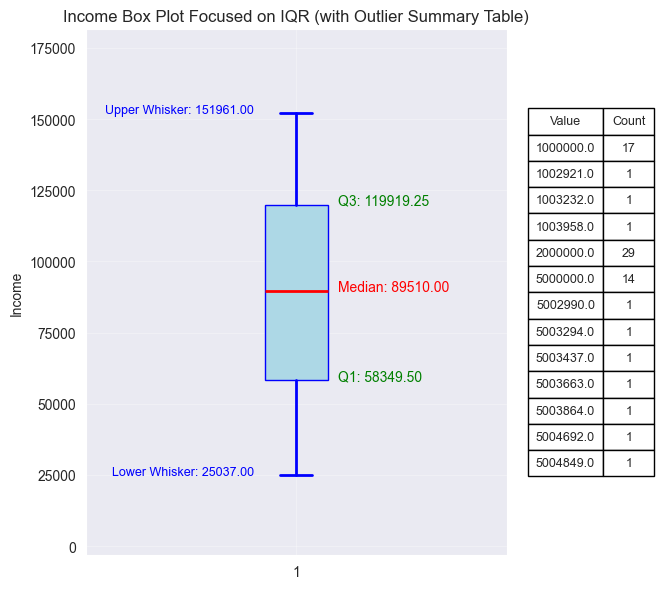

In [117]:
# --- Compute IQR and outliers ---
income = data_income['Income'].dropna()
Q1 = income.quantile(0.25)
Q3 = income.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = income[(income < lower_bound) | (income > upper_bound)]

# --- Count repeated outlier values ---
if len(outliers) > 0:
    outlier_counts = outliers.value_counts().reset_index()
    outlier_counts.columns = ['Outlier Value', 'Count']
    outlier_counts = outlier_counts.sort_values('Outlier Value')
else:
    outlier_counts = pd.DataFrame(columns=['Outlier Value', 'Count'])

# --- Create figure ---
plt.figure(figsize=(11, 6))
box = plt.boxplot(
    income,
    vert=True,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='blue'),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='blue', linewidth=2),
    capprops=dict(color='blue', linewidth=2),
    flierprops=dict(marker='o', color='orange', alpha=0.7)
)

plt.title('Income Box Plot Focused on IQR (with Outlier Summary Table)')
plt.ylabel('Income')
plt.grid(True, alpha=0.3)

# Focus on IQR range
plt.ylim(Q1 - IQR, Q3 + IQR)

# --- Annotate quartiles and median ---
plt.text(1.1, Q1, f'Q1: {Q1:.2f}', color='green')
plt.text(1.1, income.median(), f'Median: {income.median():.2f}', color='red')
plt.text(1.1, Q3, f'Q3: {Q3:.2f}', color='green')

# --- Annotate actual whisker values from boxplot ---
lower_whisker = box['whiskers'][0].get_ydata()[1]  # bottom whisker
upper_whisker = box['whiskers'][1].get_ydata()[1]  # top whisker

plt.text(0.9, lower_whisker, f'Lower Whisker: {lower_whisker:.2f}', color='blue', fontsize=9, ha='right')
plt.text(0.9, upper_whisker, f'Upper Whisker: {upper_whisker:.2f}', color='blue', fontsize=9, ha='right')

# --- Plot visible outliers ---
visible_outliers = outliers[(outliers >= plt.ylim()[0]) & (outliers <= plt.ylim()[1])]
for val in visible_outliers:
    plt.plot(1, val, 'ro')
    plt.text(1.05, val, f'{val:.2f}', color='orange', fontsize=8)

# --- Side table of outliers ---
if not outlier_counts.empty:
    table_data = outlier_counts.round(2).astype(str).values.tolist()
    table_data.insert(0, ['Value', 'Count'])  # header row

    plt.table(
        cellText=table_data,
        colWidths=[0.15, 0.1],
        cellLoc='center',
        loc='right',
        colLabels=None,
        bbox=[1.05, 0.15, 0.3, 0.7]  # [x, y, width, height]
    )
else:
    plt.gcf().text(
        0.8, 0.5, "No outliers detected",
        fontsize=11, color='gray',
        bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'),
        va='center', ha='left'
    )

plt.tight_layout(rect=[0, 0, 0.75, 1])  # leave space for table
plt.show()

In [118]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(data_income["Income"]))
threshold = 2 # 2 standard deviation away

income_outliers_zscore = data_income[z_scores > threshold]

income_outliers_zscore["Income"]

116     5003294.0
127     2000000.0
149     2000000.0
168     2000000.0
207     1002921.0
          ...    
3228    5000000.0
3230    2000000.0
3343    1000000.0
3458    1000000.0
3470    5000000.0
Name: Income, Length: 70, dtype: float64

In [119]:
data_income[data_income["Income"] > income_upper_outliers_value]

,CustomerID,Age,Gender,Income,Tenure,ProductType,SupportCalls,ChurnStatus
116,CUST0116,50.0,0,5003294.0,7.0,0,10.0,0
127,CUST0127,50.0,1,2000000.0,9.0,1,14.0,0
149,CUST0149,44.0,0,2000000.0,9.0,0,10.0,0
168,CUST0168,32.0,1,2000000.0,7.0,0,12.0,0
207,CUST0207,59.0,1,1002921.0,5.0,0,3.0,0
...,...,...,...,...,...,...,...,...
3228,CUST3228,53.0,1,5000000.0,8.0,1,7.0,0
3230,CUST3230,47.0,0,2000000.0,8.0,0,3.0,0
3343,CUST3343,37.0,0,1000000.0,3.0,0,5.0,0
3458,CUST3458,46.0,0,1000000.0,9.0,0,5.0,0


#### Dropping —- No we will lose too much data
#### Smoothing —- Data is too high smoothing wont work 
#### Capping at upper whisker —-- Keeps the Data Rows but it helps deal with the outliers

In [120]:
data_income.loc[data_income["Income"] > income_upper_outliers_value, "Income"] = income_upper_outliers_value

In [121]:
data_income[data_income["Income"] > income_upper_outliers_value]

,CustomerID,Age,Gender,Income,Tenure,ProductType,SupportCalls,ChurnStatus


#### New Skew Value

In [122]:
skew_value = data_income["Income"].skew()
print(f"Skewness of '{"Income"}': {skew_value}")

Skewness of 'Income': 0.43206722636609085


### Tenure
#### Tenure: Dealing with **Missing Values**

In [123]:
data_tenure = data_income.copy()
skew_value = data_tenure["Tenure"].skew()
print(f"Skewness of '{"Tenure"}': {skew_value}")

Skewness of 'Tenure': -0.03574339380279491


#### The values are approximately normally distributed with minimal skew, so we can use the mean. Since both the mean and median are around 5, we will fill the missing values with 5.


In [124]:
data_tenure["Tenure"].fillna(int(data_tenure["Tenure"].median()), inplace=True)

In [125]:
print(data_tenure.isnull().sum())

CustomerID        0
Age               0
Gender            0
Income            0
Tenure            0
ProductType       0
SupportCalls    171
ChurnStatus       0
dtype: int64


In [126]:
skew_value = data_tenure["Tenure"].skew()
print(f"Skewness of '{"Tenure"}': {skew_value}")

Skewness of 'Tenure': -0.034164892359827635


#### Tenure: Dealing with **Outliers**
none

### Support Calls
#### Support Calls: Dealing with **Outliers**

In [127]:
data_sc = data_tenure.copy()
skew_value = data_sc["SupportCalls"].skew()
print(f"Skewness of '{"SupportCalls"}': {skew_value}")

Skewness of 'SupportCalls': 7.009042035303684


In [128]:
data_sc.loc[data_sc["SupportCalls"] > 25, "SupportCalls"] = 7

In [129]:
data_sc["SupportCalls"].mean(), data_sc["SupportCalls"].median()

(np.float64(7.07063420498948), np.float64(7.0))

#### Support Calls: Dealing with **Missing Values**

In [130]:
data_sc["SupportCalls"].fillna(int(data_sc["SupportCalls"].median()), inplace=True)

In [131]:
print(data_sc.isnull().sum())


CustomerID      0
Age             0
Gender          0
Income          0
Tenure          0
ProductType     0
SupportCalls    0
ChurnStatus     0
dtype: int64


In [132]:
skew_value = data_sc["SupportCalls"].skew()
print(f"Skewness of '{"SupportCalls"}': {skew_value}")

Skewness of 'SupportCalls': 0.0913631015614716


In [133]:
data = data_sc.copy()

## Re-print the data plots after pre-processing

### Plotting **Numerical** Data

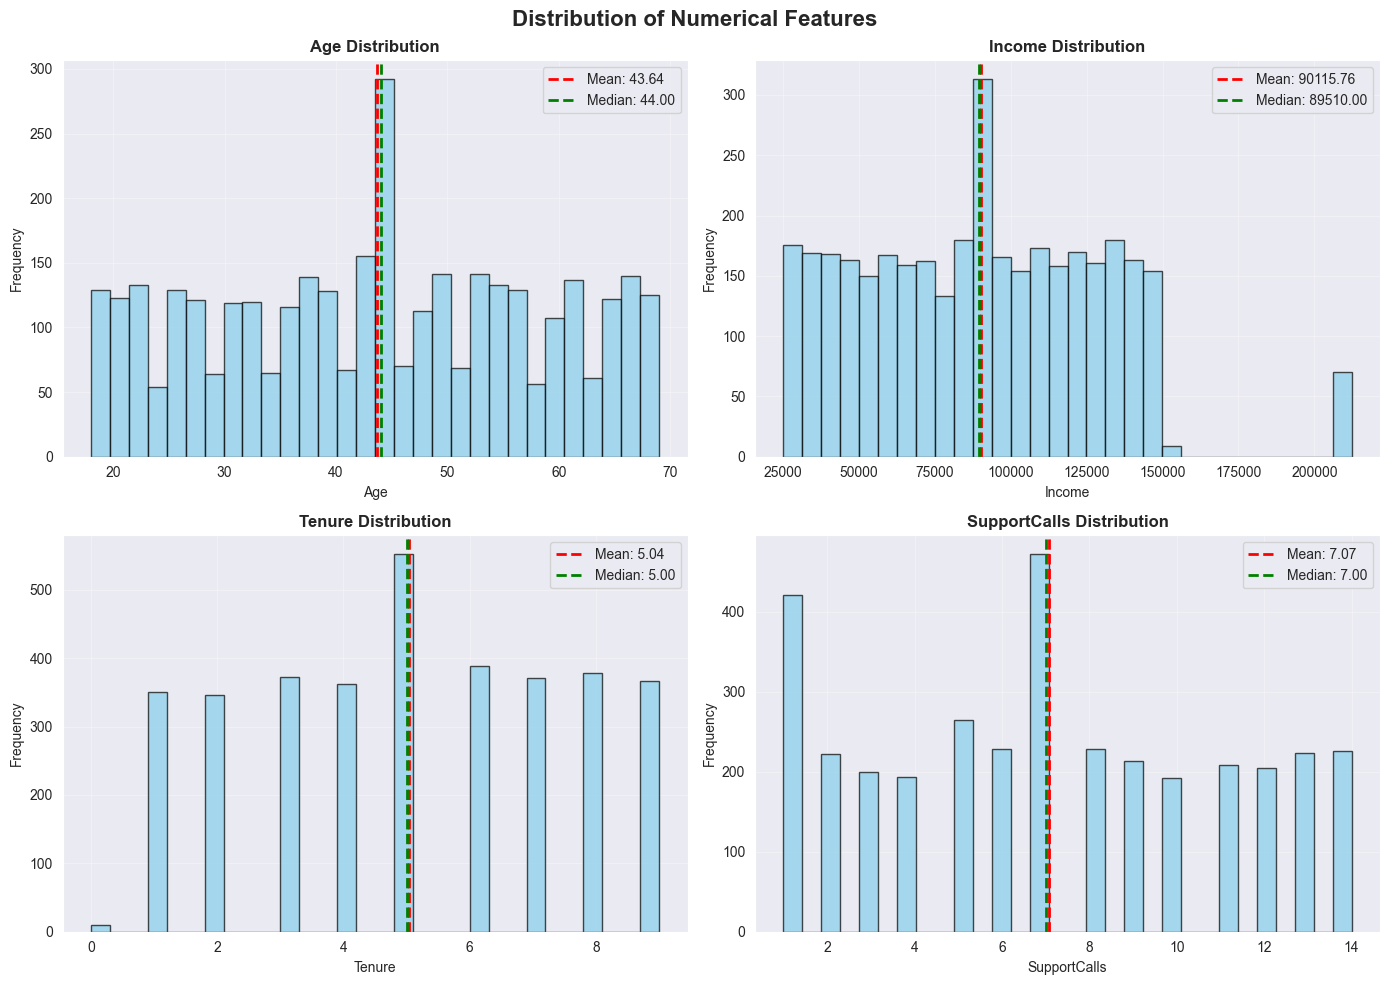

In [134]:
import matplotlib.pyplot as plt
import math
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features.remove("Gender")
numerical_features.remove("ProductType")
numerical_features.remove("ChurnStatus")

n_features = len(numerical_features)
n_cols = 2
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(7*n_cols, 5*n_rows))
fig.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold')
axes = axes.flatten() if n_features > 1 else [axes]
for idx, feature in enumerate(numerical_features):
    axes[idx].hist(data[feature], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{feature} Distribution', fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].axvline(data[feature].mean(), color='red', linestyle='--', 
                      linewidth=2, label=f'Mean: {data[feature].mean():.2f}')
    axes[idx].axvline(data[feature].median(), color='green', linestyle='--', 
                      linewidth=2, label=f'Median: {data[feature].median():.2f}')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.savefig('distributions.png', dpi=300, bbox_inches='tight')
plt.show()

### Plotting **Categorical** Data

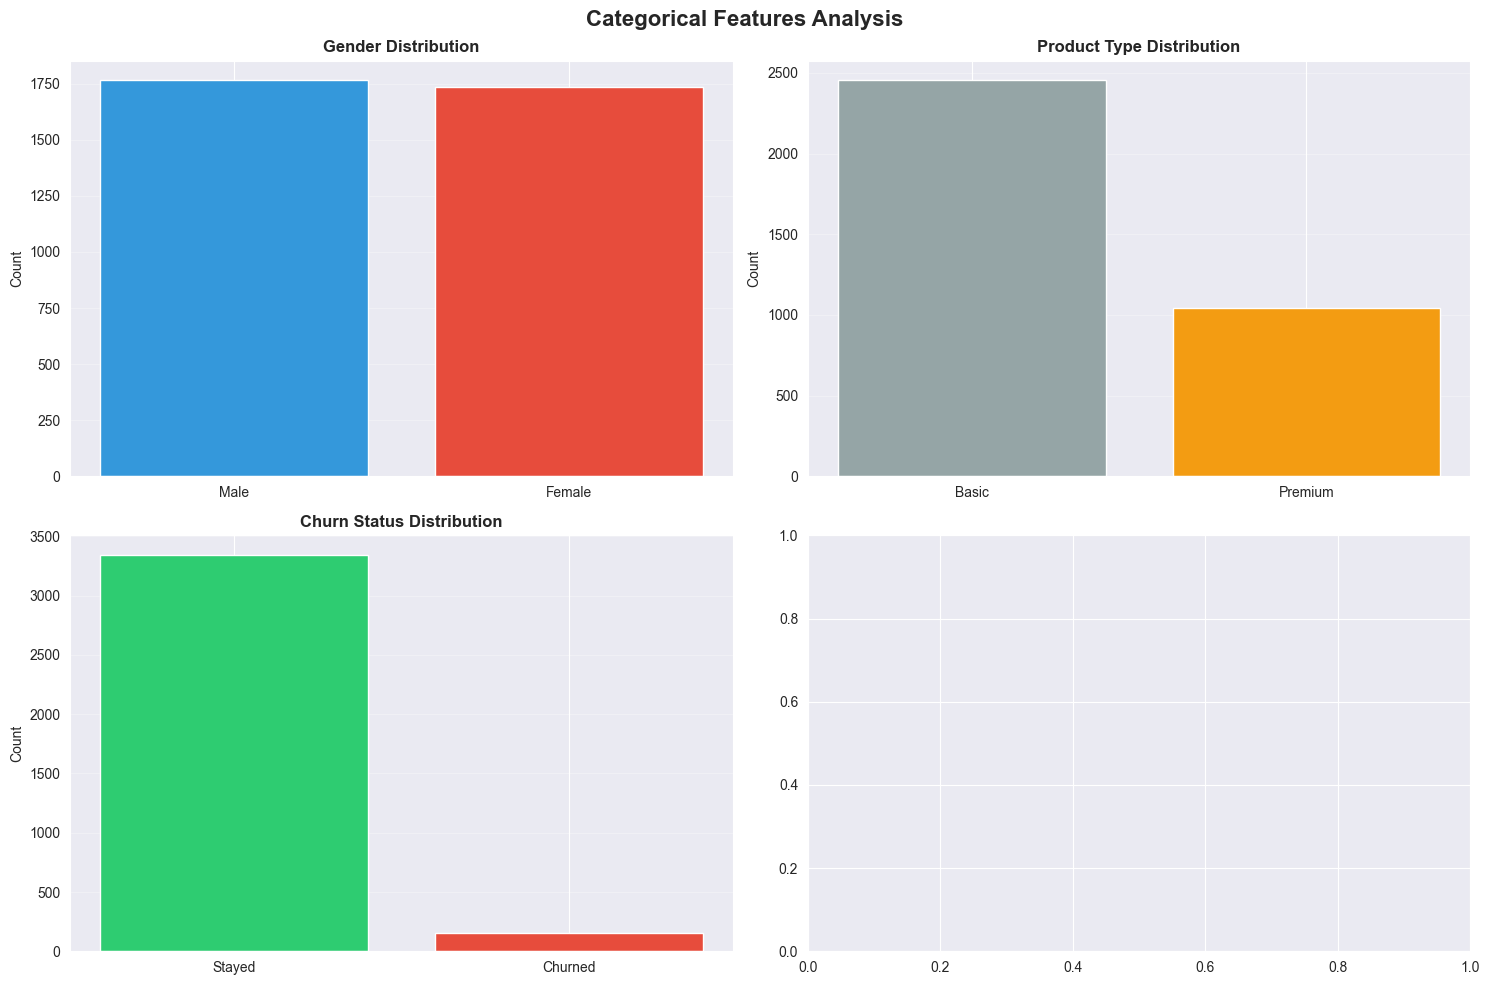

In [135]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Categorical Features Analysis', fontsize=16, fontweight='bold')
# Gender distribution
gender_counts = data['Gender'].value_counts()
axes[0, 0].bar(['Male', 'Female'], gender_counts.values, color=['#3498db', '#e74c3c'])
axes[0, 0].set_title('Gender Distribution', fontweight='bold')
axes[0, 0].set_ylabel('Count')
axes[0, 0].grid(True, alpha=0.3, axis='y')
# Product Type distribution
product_counts = data['ProductType'].value_counts()
axes[0, 1].bar(['Basic', 'Premium'], product_counts.values, color=['#95a5a6', '#f39c12'])
axes[0, 1].set_title('Product Type Distribution', fontweight='bold')
axes[0, 1].set_ylabel('Count')
axes[0, 1].grid(True, alpha=0.3, axis='y')
# Churn Status distribution
churn_counts = data['ChurnStatus'].value_counts()
colors = ['#2ecc71', '#e74c3c']
axes[1, 0].bar(['Stayed', 'Churned'], churn_counts.values, color=colors)
axes[1, 0].set_title('Churn Status Distribution', fontweight='bold')
axes[1, 0].set_ylabel('Count')
axes[1, 0].grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## Normalizing The data - 

In [136]:
data_standardized = data.copy()
data_standardized["Income"] = (data_standardized["Income"] - data_standardized["Income"].mean()) / data_standardized["Income"].std()

data_standardized["Age"] = (data_standardized["Age"] - data_standardized["Age"].mean()) / data_standardized["Age"].std()

data_standardized["SupportCalls"] = (data_standardized["SupportCalls"] - data_standardized["SupportCalls"].mean()) / data_standardized["SupportCalls"].std()

data_standardized["Tenure"] = (data_standardized["Tenure"] - data_standardized["Tenure"].mean()) / data_standardized["Tenure"].std()


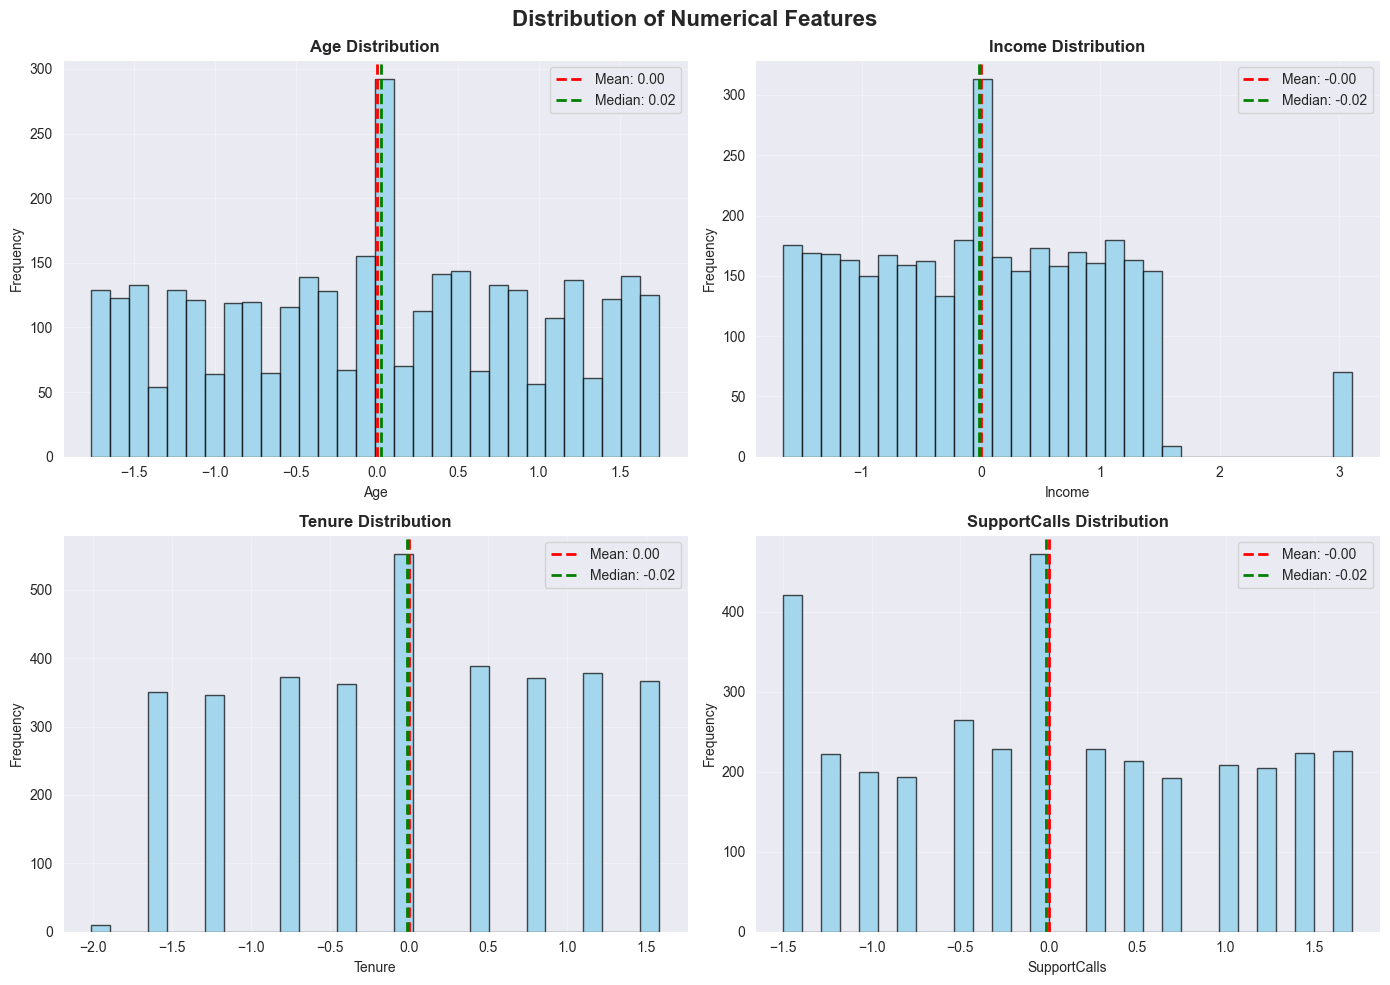

In [137]:
data = data_standardized
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features.remove("Gender")
numerical_features.remove("ProductType")
numerical_features.remove("ChurnStatus")

n_features = len(numerical_features)
n_cols = 2
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(7*n_cols, 5*n_rows))
fig.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold')
axes = axes.flatten() if n_features > 1 else [axes]
for idx, feature in enumerate(numerical_features):
    axes[idx].hist(data[feature], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{feature} Distribution', fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].axvline(data[feature].mean(), color='red', linestyle='--', 
                      linewidth=2, label=f'Mean: {data[feature].mean():.2f}')
    axes[idx].axvline(data[feature].median(), color='green', linestyle='--', 
                      linewidth=2, label=f'Median: {data[feature].median():.2f}')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.savefig('distributions.png', dpi=300, bbox_inches='tight')
plt.show()

### Sactter Plot

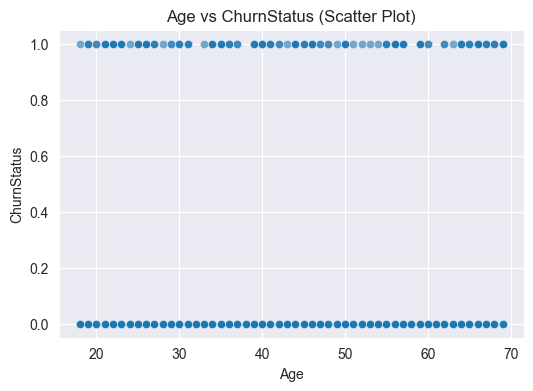

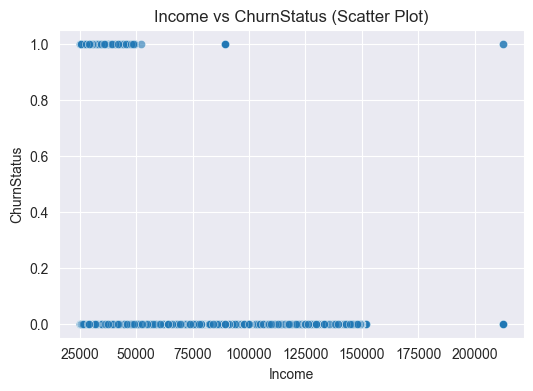

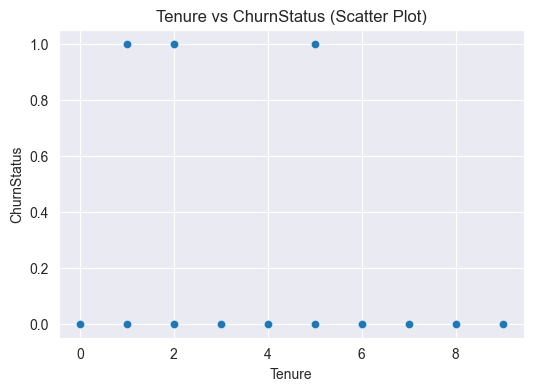

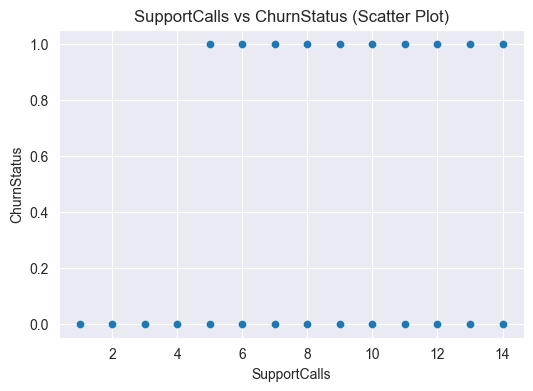

In [138]:
data = data_sc.copy()
import seaborn as sns

numeric_cols = data.select_dtypes(include=["float64", "int64"]).columns.drop(["ChurnStatus", "ProductType", "Gender"])

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=data, x=col, y="ChurnStatus", alpha=0.6)
    plt.title(f"{col} vs ChurnStatus (Scatter Plot)")
    plt.show()

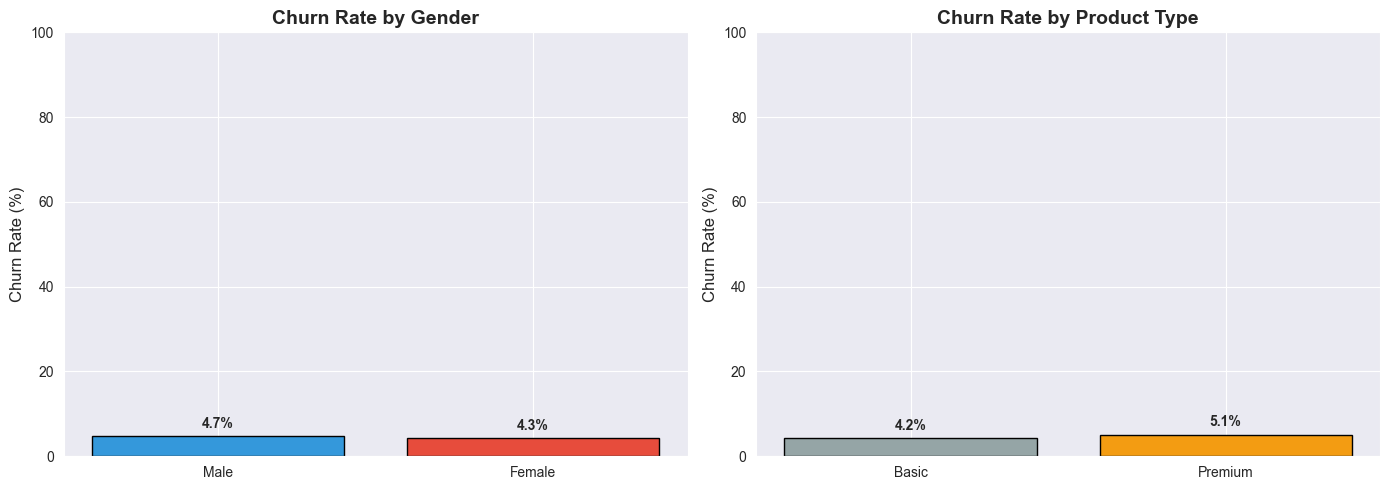

In [139]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

gender_churn = data.groupby('Gender')['ChurnStatus'].mean() * 100
axes[0].bar(['Male', 'Female'], gender_churn.values, color=['#3498db', '#e74c3c'], edgecolor='black')
axes[0].set_title('Churn Rate by Gender', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Churn Rate (%)', fontsize=12)
axes[0].set_ylim(0, 100)
for i, v in enumerate(gender_churn.values):
    axes[0].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

product_churn = data.groupby('ProductType')['ChurnStatus'].mean() * 100
axes[1].bar(['Basic', 'Premium'], product_churn.values, color=['#95a5a6', '#f39c12'], edgecolor='black')
axes[1].set_title('Churn Rate by Product Type', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Churn Rate (%)', fontsize=12)
axes[1].set_ylim(0, 100)
for i, v in enumerate(product_churn.values):
    axes[1].text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


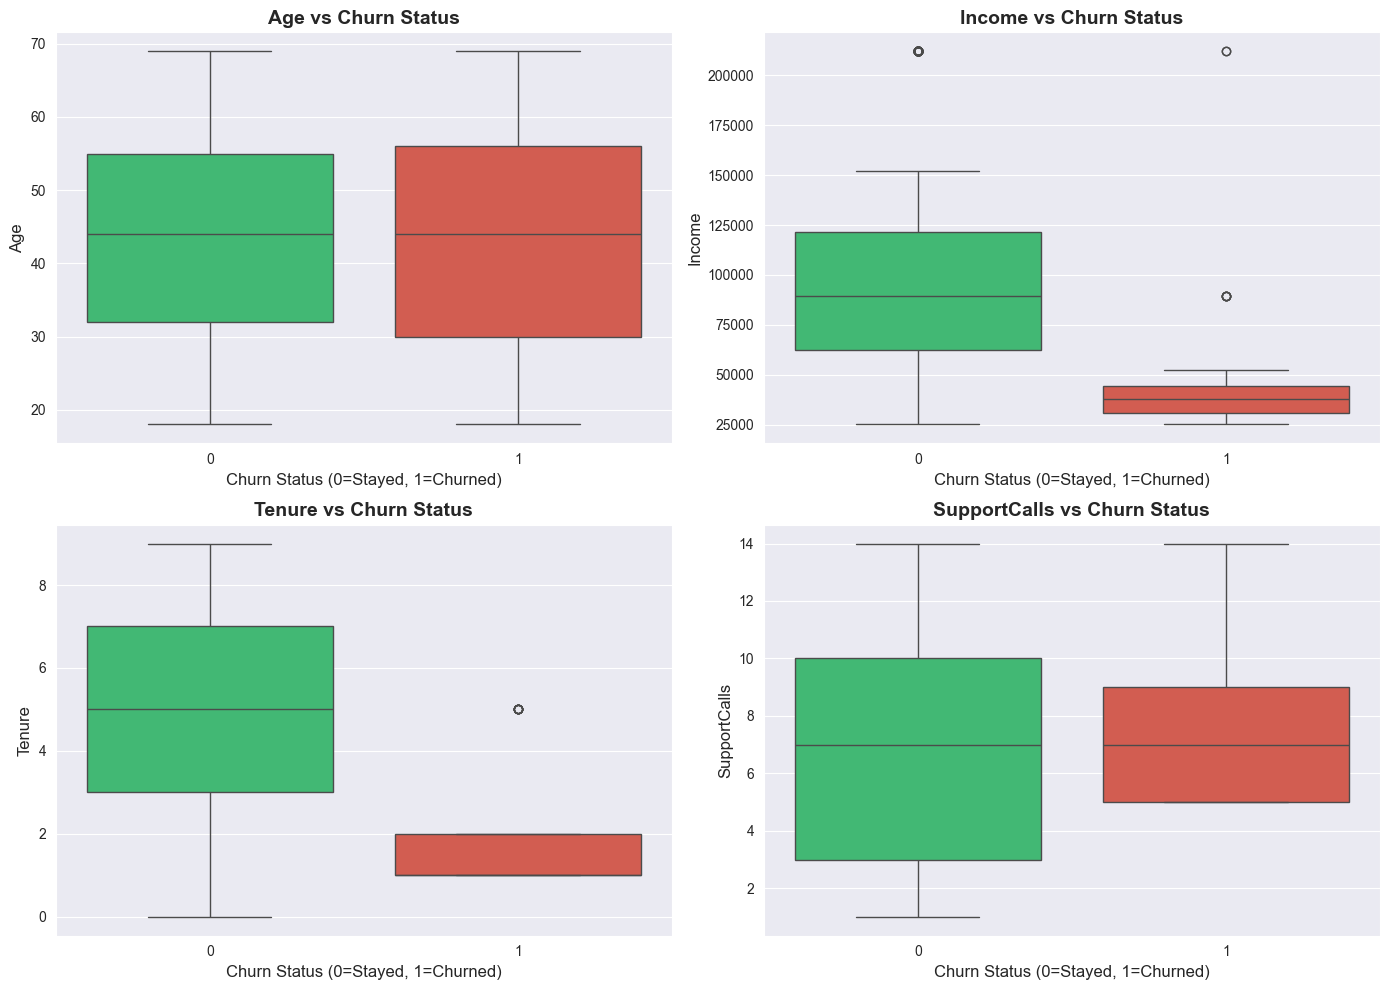

In [140]:
numerical_features = ['Age', 'Income', 'Tenure', 'SupportCalls']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    sns.boxplot(data=data, x='ChurnStatus', y=col, ax=axes[idx], palette=['#2ecc71', '#e74c3c'])
    axes[idx].set_title(f'{col} vs Churn Status', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Churn Status (0=Stayed, 1=Churned)', fontsize=12)
    axes[idx].set_ylabel(col, fontsize=12)

plt.tight_layout()
plt.show()
    


Correlation with ChurnStatus:
ChurnStatus     1.000000
SupportCalls    0.027787
ProductType     0.018394
Age            -0.001885
Gender         -0.010568
Income         -0.270747
Tenure         -0.296005
Name: ChurnStatus, dtype: float64


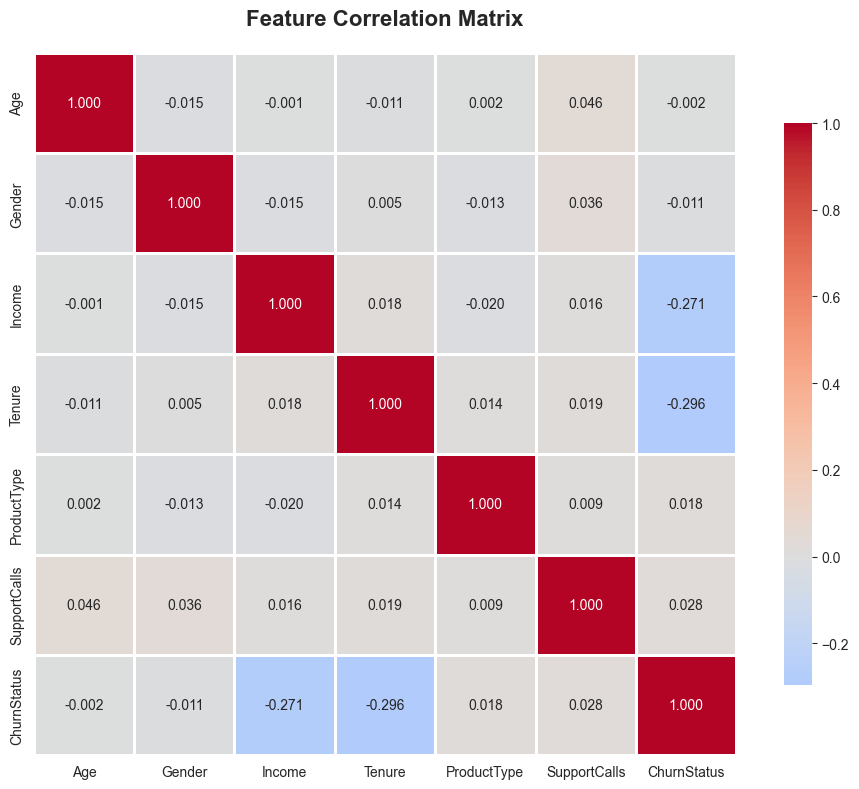

In [141]:

# Drop unwanted column
data_corr_matrix = data.drop(["CustomerID"], axis=1)

# Compute correlation matrix
data_corr_matrix = data_corr_matrix.corr(method='pearson')

# Print correlation with ChurnStatus (sorted)
print("Correlation with ChurnStatus:")
print(data_corr_matrix['ChurnStatus'].sort_values(ascending=False))

# Define numeric columns you want in the heatmap
numerical_cols = ['Age', 'Gender', 'Income', 'Tenure', 'ProductType', 'SupportCalls', 'ChurnStatus']
correlation_matrix = data[numerical_cols].corr(method='pearson')

# Plot full heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)

ax.set_title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()
